In [12]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [15]:
#df = pd.read_csv('/mnt/DATA/ML/training/keras/clickbait/server/scores-together.txt', sep='\t')

def parameter_string_to_dict(parameters):
    parameters_list = (' ' + parameters).split(' --')[1:]
    parameters_dict = dict([p.split(' ') for p in parameters_list])
    return parameters_dict

def read_scores(path, marker):
    df_scores = pd.read_csv(path, sep='\t', 
                     names=['time', 'val_mean_squared_error', 'epochs', 'parameters'], 
                     converters={'time': (lambda x: x.split(': ')[1]),
                                 'val_mean_squared_error': (lambda x: float(x.split(': ')[1])), 
                                 'epochs': (lambda x: x.split(': ')[1]), 
                                 'parameters': (lambda x: parameter_string_to_dict(x.split(': ')[1]))}
                    )
    df_scores['marker'] = marker
    df_params = pd.DataFrame(df_scores['parameters'].tolist())
    del df_scores['parameters']
    return pd.concat([df_scores, df_params], axis=1)

In [19]:
#base_path = '/mnt/DATA/ML/training/keras/clickbait/server'
base_path = os.getcwd()
df_wimages = read_scores(path=os.path.join(base_path, 'scores-inceptionresnetv2.orig.txt'),
                         marker='inceptionresnetv2')
df_noimages = read_scores(path=os.path.join(base_path, 'scores-noimages.orig.txt'),
                         marker='noimage')
df_wimages_big = read_scores(path=os.path.join(base_path, 'scores-inceptionresnetv2-big.orig.txt'),
                         marker='inceptionresnetv2-big')
#df_noimages_big = read_scores(path='/mnt/DATA/ML/training/keras/clickbait/server/scores-noimages-big.orig.txt',
#                         image_function_name='None-big')

df = pd.concat([df_wimages, df_noimages, df_wimages_big])

# remove outliers
# per group
#df_grouped = df.groupby('marker')['val_mean_squared_error']
#df = df[df_grouped.transform(lambda x : (x<x.quantile(0.95))&(x>(x.quantile(0.05)))).eq(1)]
# total
#df = df[df['val_mean_squared_error'].transform(lambda x : (x<x.quantile(0.95))&(x>(x.quantile(0.05)))).eq(1)]
df = df[df['val_mean_squared_error'] < 0.1]

#df.sort_values('val_mean_squared_error')
df


,batch-size,dev-dir,epochs,feature-shapes,image-embedding-function,marker,model-dir,nb-epoch,nb-threads,rep,setting,time,train-dir,val_mean_squared_error
0,100,/mnt/hdd/datasets/clickbait/clickbait17-valida...,16,"{""targetParagraphs"":{""model"":""create_lstm"",""ma...",inception_resnet_v2.InceptionResNetV2,inceptionresnetv2,/mnt/hdd/experiments/abinder/clickbait/exp_inc...,100,5,0,"{""final_layers"":[512],""dropout"":0.5,""learn_rat...",2018-06-22 16:51:26,/mnt/hdd/datasets/clickbait/clickbait17-train-...,0.0424
1,100,/mnt/hdd/datasets/clickbait/clickbait17-valida...,16,"{""targetParagraphs"":{""model"":""create_lstm"",""ma...",inception_resnet_v2.InceptionResNetV2,inceptionresnetv2,/mnt/hdd/experiments/abinder/clickbait/exp_inc...,100,5,1,"{""final_layers"":[512],""dropout"":0.5,""learn_rat...",2018-06-22 17:58:36,/mnt/hdd/datasets/clickbait/clickbait17-train-...,0.0433
2,100,/mnt/hdd/datasets/clickbait/clickbait17-valida...,13,"{""targetParagraphs"":{""model"":""create_lstm"",""ma...",inception_resnet_v2.InceptionResNetV2,inceptionresnetv2,/mnt/hdd/experiments/abinder/clickbait/exp_inc...,100,5,2,"{""final_layers"":[512],""dropout"":0.5,""learn_rat...",2018-06-22 18:53:17,/mnt/hdd/datasets/clickbait/clickbait17-train-...,0.0435
3,100,/mnt/hdd/datasets/clickbait/clickbait17-valida...,11,"{""targetParagraphs"":{""model"":""create_lstm"",""ma...",inception_resnet_v2.InceptionResNetV2,inceptionresnetv2,/mnt/hdd/experiments/abinder/clickbait/exp_inc...,100,5,3,"{""final_layers"":[512],""dropout"":0.5,""learn_rat...",2018-06-22 19:39:55,/mnt/hdd/datasets/clickbait/clickbait17-train-...,0.0431
4,100,/mnt/hdd/datasets/clickbait/clickbait17-valida...,10,"{""targetParagraphs"":{""model"":""create_lstm"",""ma...",inception_resnet_v2.InceptionResNetV2,inceptionresnetv2,/mnt/hdd/experiments/abinder/clickbait/exp_inc...,100,5,4,"{""final_layers"":[512],""dropout"":0.5,""learn_rat...",2018-06-22 20:22:05,/mnt/hdd/datasets/clickbait/clickbait17-train-...,0.0435
5,100,/mnt/hdd/datasets/clickbait/clickbait17-valida...,12,"{""targetParagraphs"":{""model"":""create_lstm"",""ma...",inception_resnet_v2.InceptionResNetV2,inceptionresnetv2,/mnt/hdd/experiments/abinder/clickbait/exp_inc...,100,5,5,"{""final_layers"":[512],""dropout"":0.5,""learn_rat...",2018-06-22 21:12:38,/mnt/hdd/datasets/clickbait/clickbait17-train-...,0.0439
6,100,/mnt/hdd/datasets/clickbait/clickbait17-valida...,8,"{""targetParagraphs"":{""model"":""create_lstm"",""ma...",inception_resnet_v2.InceptionResNetV2,inceptionresnetv2,/mnt/hdd/experiments/abinder/clickbait/exp_inc...,100,5,6,"{""final_layers"":[512],""dropout"":0.5,""learn_rat...",2018-06-22 21:47:04,/mnt/hdd/datasets/clickbait/clickbait17-train-...,0.0434
7,100,/mnt/hdd/datasets/clickbait/clickbait17-valida...,13,"{""targetParagraphs"":{""model"":""create_lstm"",""ma...",inception_resnet_v2.InceptionResNetV2,inceptionresnetv2,/mnt/hdd/experiments/abinder/clickbait/exp_inc...,100,5,7,"{""final_layers"":[512],""dropout"":0.5,""learn_rat...",2018-06-22 22:42:49,/mnt/hdd/datasets/clickbait/clickbait17-train-...,0.0449
8,100,/mnt/hdd/datasets/clickbait/clickbait17-valida...,12,"{""targetParagraphs"":{""model"":""create_lstm"",""ma...",inception_resnet_v2.InceptionResNetV2,inceptionresnetv2,/mnt/hdd/experiments/abinder/clickbait/exp_inc...,100,5,8,"{""final_layers"":[512],""dropout"":0.5,""learn_rat...",2018-06-22 23:34:30,/mnt/hdd/datasets/clickbait/clickbait17-train-...,0.0433
9,100,/mnt/hdd/datasets/clickbait/clickbait17-valida...,11,"{""targetParagraphs"":{""model"":""create_lstm"",""ma...",inception_resnet_v2.InceptionResNetV2,inceptionresnetv2,/mnt/hdd/experiments/abinder/clickbait/exp_inc...,100,5,9,"{""final_layers"":[512],""dropout"":0.5,""learn_rat...",2018-06-23 00:22:07,/mnt/hdd/datasets/clickbait/clickbait17-train-...,0.0425


('inceptionresnetv2', 'inceptionresnetv2-big', 'noimage')


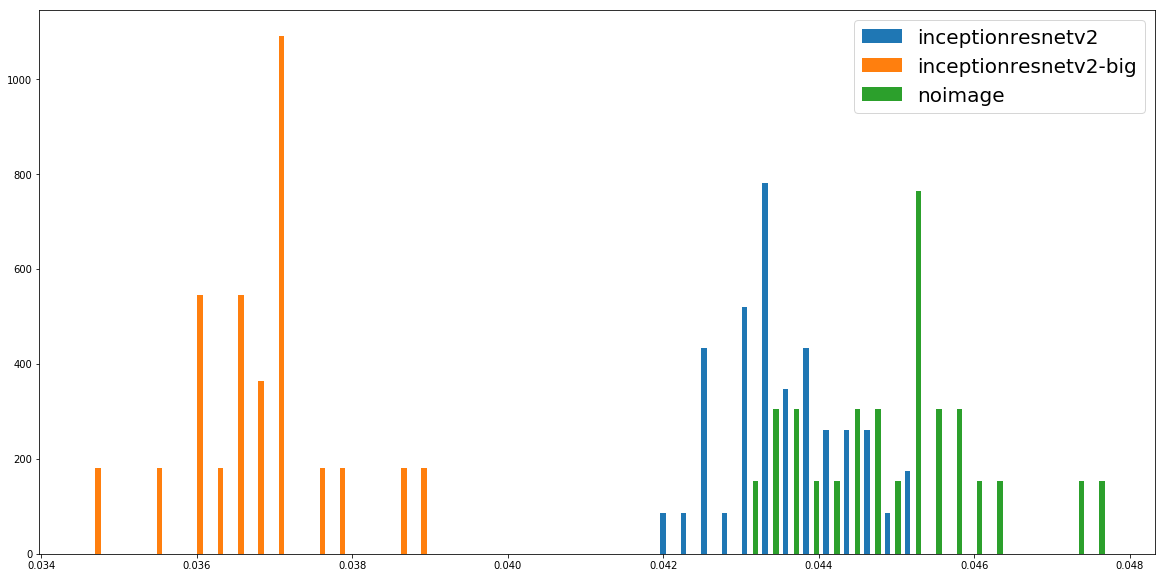

In [141]:
#df.hist(bins=100, column='val_mean_squared_error', by='image_function', figsize=(20,10), density=True, histtype='bar')
#plt.figure()

df_grouped = df.groupby('marker')
labels, vals = zip(*[(name, group['val_mean_squared_error']) for name, group in df_grouped])
print(labels)

#np.random.seed(19680801)

#for n, group in df_grouped:
#    print(n)
    #print(group['val_mean_squared_error'])

#colors = ['red', 'tan', 'lime']
plt.figure(1, figsize=(20,10))
n, bins, patches = plt.hist(vals, bins = 50, density=True, histtype='bar', label=labels)#, color=colors, label=colors)
ax = plt.gca()
ax.legend(prop={'size': 20})
#print(type(fig))
#fig.axes[0].legend(prop={'size': 10})
#ax0, ax1, ax2, ax3 = axes.flatten()

#print(len(fig.axes))
#fig.axes[0].hist(x, n_bins, density=True, histtype='bar', color=colors, label=colors)
#fig.axes[0].legend(prop={'size': 10})
#fig.axes[0].set_title('bars with legend')


Text(0.5,0.98,u'')

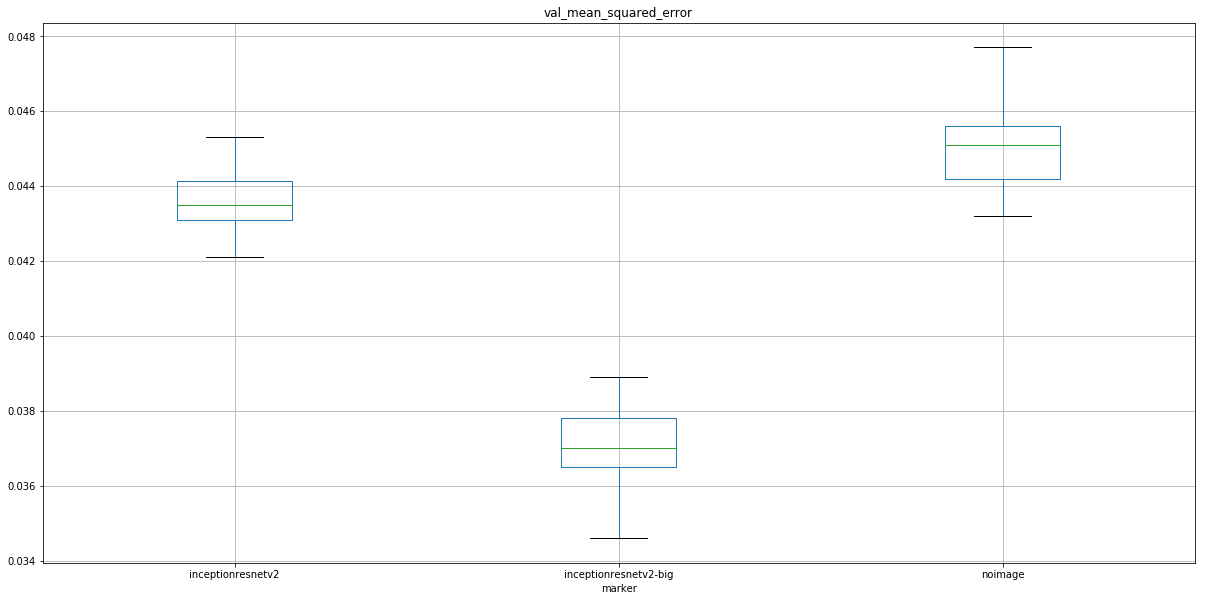

In [136]:
axes = df.boxplot(column='val_mean_squared_error', by='marker', showfliers=False, figsize=(20,10))
#fig = np.asarray(axes).reshape(-1)[0].get_figure()
#np.asarray(axes).shape
fig = axes.get_figure()
fig.suptitle('')


In [6]:
np.asarray(axes).shape


()

In [7]:
pd.set_option('display.max_colwidth', -1)
df_wimages_big.sort_values(by=['val_mean_squared_error', 'model-dir'])

,time,val_mean_squared_error,epochs,image_function,batch-size,dev-dir,feature-shapes,image-embedding-function,model-dir,nb-epoch,nb-threads,rep,setting,train-dir
9,2018-06-28 09:57:02,0.0354,13,inceptionresnetv2-big,100,/mnt/hdd/datasets/clickbait/clickbait17-train-170331,"{""targetParagraphs"":{""model"":""create_lstm"",""max_length"":500,""nr_hidden"":64},""postText"":{""model"":""create_lstm"",""max_length"":50,""nr_hidden"":30},""targetTitle"":{""model"":""create_lstm"",""max_length"":50,""nr_hidden"":30},""targetKeywords"":{""model"":""create_lstm"",""max_length"":100,""nr_hidden"":30},""targetDescription"":{""model"":""create_lstm"",""max_length"":100,""nr_hidden"":30},""postMedia"":{""model"":""create_cnn_image"",""layers"":[128]}}",inception_resnet_v2.InceptionResNetV2,/mnt/hdd/experiments/abinder/clickbait/exp_inceptionresnetv2-final-trainbig/runs/10,100,7,9,"{""final_layers"":[512],""dropout"":0.5,""learn_rate"":0.001}",/mnt/hdd/datasets/clickbait/clickbait17-validation-170630
23,2018-06-29 10:34:58,0.0354,14,inceptionresnetv2-big,100,/mnt/hdd/datasets/clickbait/clickbait17-train-170331,"{""targetParagraphs"":{""model"":""create_lstm"",""max_length"":500,""nr_hidden"":64},""postText"":{""model"":""create_lstm"",""max_length"":50,""nr_hidden"":30},""targetTitle"":{""model"":""create_lstm"",""max_length"":50,""nr_hidden"":30},""targetKeywords"":{""model"":""create_lstm"",""max_length"":100,""nr_hidden"":30},""targetDescription"":{""model"":""create_lstm"",""max_length"":100,""nr_hidden"":30},""postMedia"":{""model"":""create_cnn_image"",""layers"":[128]}}",inception_resnet_v2.InceptionResNetV2,/mnt/hdd/experiments/abinder/clickbait/exp_inceptionresnetv2-final-trainbig/runs/24,100,7,23,"{""final_layers"":[512],""dropout"":0.5,""learn_rate"":0.001}",/mnt/hdd/datasets/clickbait/clickbait17-validation-170630
24,2018-06-29 12:03:44,0.0356,8,inceptionresnetv2-big,100,/mnt/hdd/datasets/clickbait/clickbait17-train-170331,"{""targetParagraphs"":{""model"":""create_lstm"",""max_length"":500,""nr_hidden"":64},""postText"":{""model"":""create_lstm"",""max_length"":50,""nr_hidden"":30},""targetTitle"":{""model"":""create_lstm"",""max_length"":50,""nr_hidden"":30},""targetKeywords"":{""model"":""create_lstm"",""max_length"":100,""nr_hidden"":30},""targetDescription"":{""model"":""create_lstm"",""max_length"":100,""nr_hidden"":30},""postMedia"":{""model"":""create_cnn_image"",""layers"":[128]}}",inception_resnet_v2.InceptionResNetV2,/mnt/hdd/experiments/abinder/clickbait/exp_inceptionresnetv2-final-trainbig/runs/25,100,7,24,"{""final_layers"":[512],""dropout"":0.5,""learn_rate"":0.001}",/mnt/hdd/datasets/clickbait/clickbait17-validation-170630
0,2018-06-27 19:32:32,0.0357,10,inceptionresnetv2-big,100,/mnt/hdd/datasets/clickbait/clickbait17-train-170331,"{""targetParagraphs"":{""model"":""create_lstm"",""max_length"":500,""nr_hidden"":64},""postText"":{""model"":""create_lstm"",""max_length"":50,""nr_hidden"":30},""targetTitle"":{""model"":""create_lstm"",""max_length"":50,""nr_hidden"":30},""targetKeywords"":{""model"":""create_lstm"",""max_length"":100,""nr_hidden"":30},""targetDescription"":{""model"":""create_lstm"",""max_length"":100,""nr_hidden"":30},""postMedia"":{""model"":""create_cnn_image"",""layers"":[128]}}",inception_resnet_v2.InceptionResNetV2,/mnt/hdd/experiments/abinder/clickbait/exp_inceptionresnetv2-final-trainbig/runs/1,100,7,0,"{""final_layers"":[512],""dropout"":0.5,""learn_rate"":0.001}",/mnt/hdd/datasets/clickbait/clickbait17-validation-170630
13,2018-06-28 16:14:32,0.0361,8,inceptionresnetv2-big,100,/mnt/hdd/datasets/clickbait/clickbait17-train-170331,"{""targetParagraphs"":{""model"":""create_lstm"",""max_length"":500,""nr_hidden"":64},""postText"":{""model"":""create_lstm"",""max_length"":50,""nr_hidden"":30},""targetTitle"":{""model"":""create_lstm"",""max_length"":50,""nr_hidden"":30},""targetKeywords"":{""model"":""create_lstm"",""max_length"":100,""nr_hidden"":30},""targetDescription"":{""model"":""creat

In [8]:
pd.set_option('display.max_colwidth', -1)
df_noimages_big.sort_values(by=['val_mean_squared_error', 'model-dir'])

,time,val_mean_squared_error,epochs,image_function,batch-size,dev-dir,feature-shapes,image-embedding-function,model-dir,nb-epoch,nb-threads,rep,setting,train-dir
16,2018-06-30 14:02:55,0.0346,8,None-big,100,/mnt/hdd/datasets/clickbait/clickbait17-train-170331,"{""targetParagraphs"":{""model"":""create_lstm"",""max_length"":500,""nr_hidden"":64},""postText"":{""model"":""create_lstm"",""max_length"":50,""nr_hidden"":30},""targetTitle"":{""model"":""create_lstm"",""max_length"":50,""nr_hidden"":30},""targetKeywords"":{""model"":""create_lstm"",""max_length"":100,""nr_hidden"":30},""targetDescription"":{""model"":""create_lstm"",""max_length"":100,""nr_hidden"":30},""postMedia"":{""model"":""create_cnn_image"",""layers"":[128]}}",inception_resnet_v2.InceptionResNetV2,/mnt/hdd/experiments/abinder/clickbait/exp_noimages-final-trainbig/runs/16,100,7,16,"{""final_layers"":[512],""dropout"":0.5,""learn_rate"":0.001}",/mnt/hdd/datasets/clickbait/clickbait17-validation-170630
0,2018-06-29 14:08:18,0.0354,7,None-big,100,/mnt/hdd/datasets/clickbait/clickbait17-train-170331,"{""targetParagraphs"":{""model"":""create_lstm"",""max_length"":500,""nr_hidden"":64},""postText"":{""model"":""create_lstm"",""max_length"":50,""nr_hidden"":30},""targetTitle"":{""model"":""create_lstm"",""max_length"":50,""nr_hidden"":30},""targetKeywords"":{""model"":""create_lstm"",""max_length"":100,""nr_hidden"":30},""targetDescription"":{""model"":""create_lstm"",""max_length"":100,""nr_hidden"":30},""postMedia"":{""model"":""create_cnn_image"",""layers"":[128]}}",inception_resnet_v2.InceptionResNetV2,/mnt/hdd/experiments/abinder/clickbait/exp_noimages-final-trainbig/runs/0,100,7,0,"{""final_layers"":[512],""dropout"":0.5,""learn_rate"":0.001}",/mnt/hdd/datasets/clickbait/clickbait17-validation-170630
21,2018-06-30 23:01:55,0.0360,11,None-big,100,/mnt/hdd/datasets/clickbait/clickbait17-train-170331,"{""targetParagraphs"":{""model"":""create_lstm"",""max_length"":500,""nr_hidden"":64},""postText"":{""model"":""create_lstm"",""max_length"":50,""nr_hidden"":30},""targetTitle"":{""model"":""create_lstm"",""max_length"":50,""nr_hidden"":30},""targetKeywords"":{""model"":""create_lstm"",""max_length"":100,""nr_hidden"":30},""targetDescription"":{""model"":""create_lstm"",""max_length"":100,""nr_hidden"":30},""postMedia"":{""model"":""create_cnn_image"",""layers"":[128]}}",inception_resnet_v2.InceptionResNetV2,/mnt/hdd/experiments/abinder/clickbait/exp_noimages-final-trainbig/runs/21,100,7,21,"{""final_layers"":[512],""dropout"":0.5,""learn_rate"":0.001}",/mnt/hdd/datasets/clickbait/clickbait17-validation-170630
6,2018-06-30 00:08:29,0.0360,12,None-big,100,/mnt/hdd/datasets/clickbait/clickbait17-train-170331,"{""targetParagraphs"":{""model"":""create_lstm"",""max_length"":500,""nr_hidden"":64},""postText"":{""model"":""create_lstm"",""max_length"":50,""nr_hidden"":30},""targetTitle"":{""model"":""create_lstm"",""max_length"":50,""nr_hidden"":30},""targetKeywords"":{""model"":""create_lstm"",""max_length"":100,""nr_hidden"":30},""targetDescription"":{""model"":""create_lstm"",""max_length"":100,""nr_hidden"":30},""postMedia"":{""model"":""create_cnn_image"",""layers"":[128]}}",inception_resnet_v2.InceptionResNetV2,/mnt/hdd/experiments/abinder/clickbait/exp_noimages-final-trainbig/runs/6,100,7,6,"{""final_layers"":[512],""dropout"":0.5,""learn_rate"":0.001}",/mnt/hdd/datasets/clickbait/clickbait17-validation-170630
13,2018-06-30 10:05:58,0.0361,12,None-big,100,/mnt/hdd/datasets/clickbait/clickbait17-train-170331,"{""targetParagraphs"":{""model"":""create_lstm"",""max_length"":500,""nr_hidden"":64},""postText"":{""model"":""create_lstm"",""max_length"":50,""nr_hidden"":30},""targetTitle"":{""model"":""create_lstm"",""max_length"":50,""nr_hidden"":30},""targetKeywords"":{""model"":""create_lstm"",""max_length"":100,""nr_hidden"":30},""targetDescription"":{""model"":""create_lstm"",""max_length"":100,""nr_hidden"":30},""postMedia"":{""model"":""create_cnn_image"",""layers""